<a href="https://colab.research.google.com/github/Sevenings/lia1-2023-1/blob/main/DadosSuperMercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from platform import python_version
python_version()

'3.10.11'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Sevenings/lia1-2023-1/main/Aula%2012%20-%20An%C3%A1lise%20Explorat%C3%B3rio%20Dados/dataset.csv')

In [5]:
df.shape

(9700, 11)

In [6]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [7]:
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [9]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [11]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [15]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [18]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [23]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [65]:
# Qual cidade com maior valor de venda de produtos da categoria Office Supplies?
cidades = df.groupby(['Cidade']).sum()

id_max_vendas = cidades.idxmax()
venda_max = cidades.max()
print(f'A cidade {id_max_vendas.Valor_Venda} tem o maior valor de vendas: {venda_max.Valor_Venda}')

A cidade New York City tem o maior valor de vendas: 251749.219


<ipython-input-65-602737abd334>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cidades = df.groupby(['Cidade']).sum()


<ipython-input-90-d6d8425eab75>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_data = df.groupby('Data_Pedido').sum()


<Axes: xlabel='Data_Pedido'>

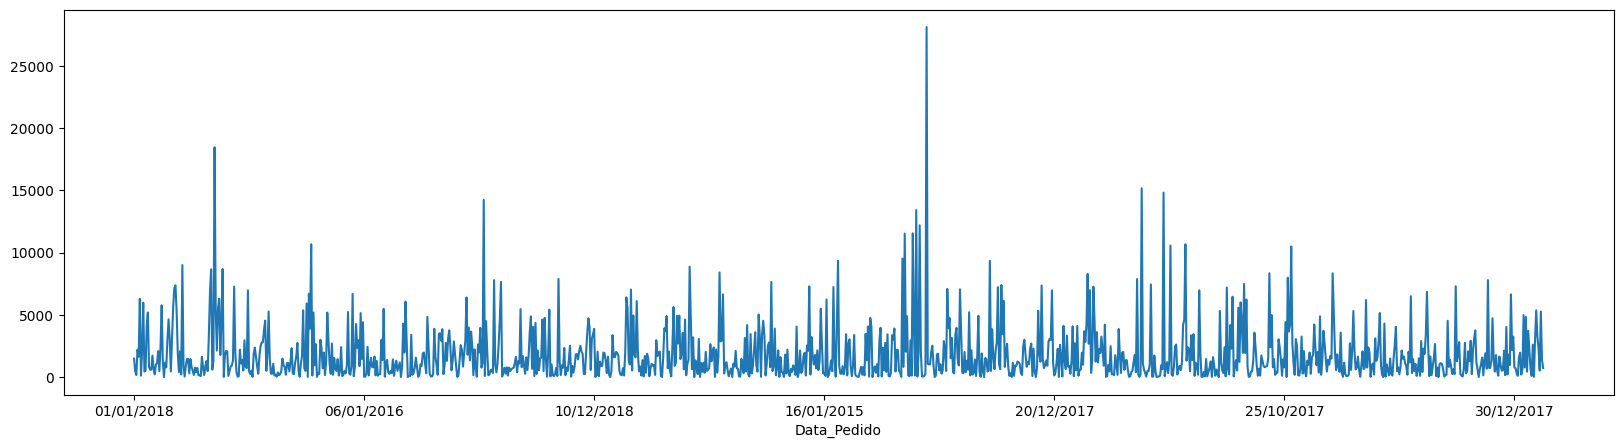

In [90]:
# Qual o Total de vendas Por Data do Pedido? Demonstrar com um Gráfico de Barras
df_data = df.groupby('Data_Pedido').sum()
vendas = df_data['Valor_Venda']

vendas.plot(figsize=(20, 5))

<ipython-input-108-7b37836f46fb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_estado = df.groupby('Estado').sum()


<Axes: ylabel='Estado'>

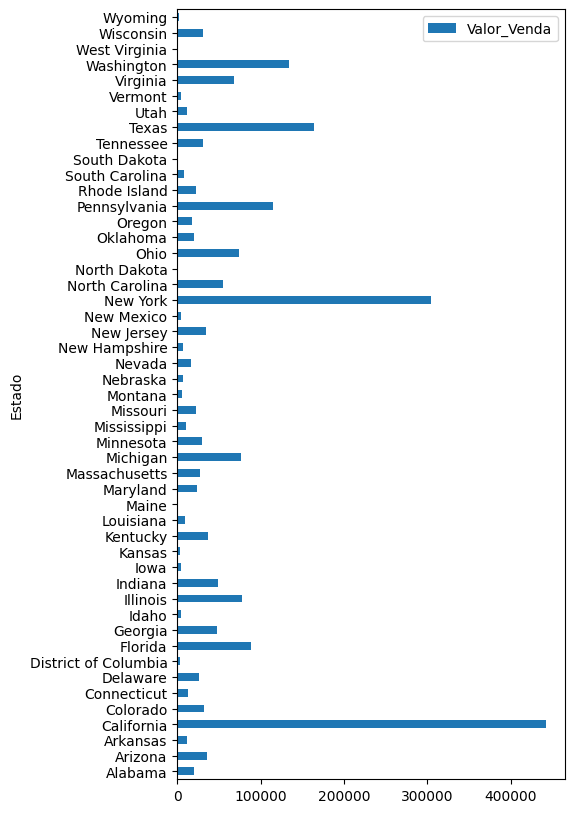

In [108]:
# Calcule o Total de Vendas por Estado e demonstre o resultado através de um gráfico de barrras
df_estado = df.groupby('Estado').sum()
df_estado.plot(kind='barh',figsize=(5,10))

<ipython-input-118-71f94f2d90f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cidades = df.groupby('Cidade').sum().sort_values('Valor_Venda', ascending=True, kind='quicksort').tail(10)


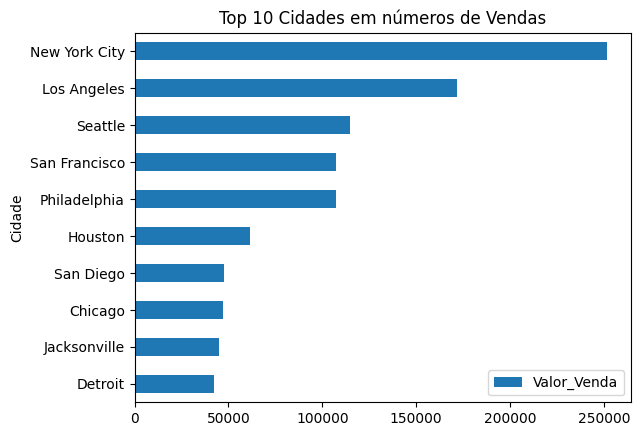

In [118]:
# Identifique as 10 Cidades com Maior Total de Vendas e demonstre o resultado através de um gráfico de barras.
df_cidades = df.groupby('Cidade').sum().sort_values('Valor_Venda', ascending=True, kind='quicksort').tail(10)
df_cidades.plot(kind='barh', title='Top 10 Cidades em números de Vendas')

<ipython-input-126-d0869cef9d59>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segmentos = df.groupby('Segmento').sum().sort_values('Valor_Venda')


<Axes: title={'center': 'Vendas por Segmentos'}, ylabel='Valor_Venda'>

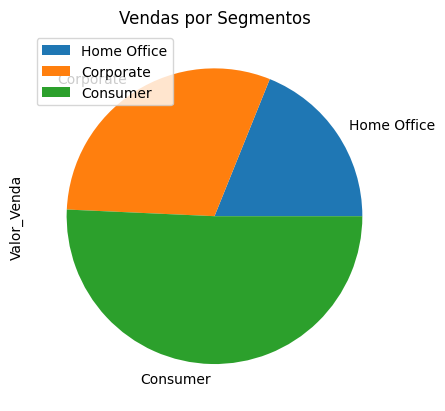

In [126]:
# Identifique qual Segmento teve o Maior Total de Vendas e demonstre o resultado através de um gráfico de pizza
df_segmentos = df.groupby('Segmento').sum().sort_values('Valor_Venda')
df_segmentos.plot(kind='pie', y='Valor_Venda', title='Vendas por Segmentos')

In [130]:
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct * total / 100))
    return ' $ {v:d}'.format(v = val)
  return my_format

# autopct_format(df_segmentos.Valor_Venda)(30)

' $ 670667'